In [58]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [59]:
df=pd.read_csv("./data/data.csv",index_col=0)

In [60]:
df.isnull().sum()

Id                      0
class                   0
num_sibling/spouse      0
num_parent/child        0
ticket                  0
price                   0
Seat                  668
departure_from          2
gender                  0
alive                   0
age                   174
dtype: int64

In [61]:
#https://www.kaggle.com/code/gunesevitan/titanic-advanced-feature-engineering-tutorial?scriptVersionId=27280410&cellId=12
df_all_corr = df.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_all_corr[df_all_corr['Feature 1'] == 'age']

,Feature 1,Feature 2,Correlation Coefficient
6,age,age,1.000000
11,age,class,0.370110
15,age,num_sibling/spouse,0.312569
21,age,num_parent/child,0.203935
25,age,price,0.091529
31,age,alive,0.077078
35,age,Id,0.043193


In [62]:
age_by_pclass_sex = df.groupby(['gender', 'class']).median()['age']

for pclass in range(1, 4):
    for gender in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, gender, age_by_pclass_sex[gender][pclass]))
print('Median age of all passengers: {}'.format(df['age'].median()))

# Filling the missing values in age with the medians of Sex and Pclass groups
df['age'] = df.groupby(['gender', 'class'])['age'].apply(lambda x: x.fillna(x.median()))

Median age of Pclass 1 females: 35.0
Median age of Pclass 1 males: 42.0
Median age of Pclass 2 females: 29.0
Median age of Pclass 2 males: 30.0
Median age of Pclass 3 females: 21.0
Median age of Pclass 3 males: 25.0
Median age of all passengers: 28.0


In [63]:
df[df["departure_from"].isnull()]

,Id,class,num_sibling/spouse,num_parent/child,ticket,price,Seat,departure_from,gender,alive,age
61,62,1,0,0,Y7YW04RMB3,80.0,B28,NaN,female,1,38.0
829,830,1,0,0,Y7YW04RMB3,80.0,B28,NaN,female,1,62.0


https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html
These 2 people are them

In [64]:
df["departure_from"]=df["departure_from"].fillna("S")

In [65]:
df[~df["Seat"].isnull()]

,Id,class,num_sibling/spouse,num_parent/child,ticket,price,Seat,departure_from,gender,alive,age
1,2,1,1,0,RWKPI7Y5RI,71.2833,C85,C,female,1,38.0
3,4,1,1,0,B46YX3C4TM,53.1000,C123,S,female,1,35.0
6,7,1,0,0,D0H80AU5I9,51.8625,E46,S,male,0,54.0
10,11,3,1,1,HJZUAK0BM5,16.7000,G6,S,female,1,4.0
11,12,1,0,0,5T631824EH,26.5500,C103,S,female,1,58.0
...,...,...,...,...,...,...,...,...,...,...,...
839,840,1,0,0,N65N3LIJCA,29.7000,C47,C,male,1,42.0
849,850,1,1,0,IZLXRECH1T,89.1042,C92,C,female,1,35.0
853,854,1,0,1,T9D19PG2JT,39.4000,D28,S,female,1,16.0
857,858,1,0,0,18HYSKBAC5,26.5500,E17,S,male,1,51.0


In [66]:
df[~df["Seat"].isnull()]["Seat"].unique()

array(['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       'E24

https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/

In [67]:
df['Family_Size']=df['num_sibling/spouse']+df['num_parent/child']

In [68]:
import re

In [69]:
#Turning Seat into Deck

df['Seat']=df["Seat"].where(pd.notnull(df["Seat"]), 'Unknown')
df['Deck']=df['Seat'].map(lambda x: re.search("\\b\\d+",x)[0] if re.search("\\b\\d+",x) else x)

We can split the deck into position and the level of cabin

In [70]:
df['position']=df['Deck'].map(lambda x: re.search("\\d+",x)[0] if re.search("\\d+",x) else "Unknown")

In [71]:
df['position'].unique()

array(['Unknown', '85', '123', '46', '6', '103', '56', '23', '78', '33',
       '30', '52', '28', '83', '73', '31', '5', '10', '26', '110', '58',
       '101', '69', '47', '86', '2', '19', '7', '49', '4', '32', '80',
       '36', '15', '93', '35', '87', '77', '67', '94', '125', '99', '118',
       '22', '106', '65', '54', '57', '34', '18', '124', '91', '40',
       '128', '37', '50', '82', '96', '44', '104', '111', '92', '38',
       '21', '12', '63', '14', '20', '79', '25', '95', '39', '70', '16',
       '68', '41', '9', '48', '126', '71', '51', '62', '24', '90', '45',
       '8', '121', '11', '3', '17', '102'], dtype=object)

In [72]:
df['level']=df['Deck'].map(lambda x: re.search("[A-Z]{1,}",x)[0])

In [73]:
df['level'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

U is unknown

In [90]:
df.isnull().sum()

Id                    0
class                 0
num_sibling/spouse    0
num_parent/child      0
ticket                0
price                 0
Seat                  0
departure_from        0
gender                0
alive                 0
age                   0
Family_Size           0
Deck                  0
position              0
level                 0
dtype: int64

In [91]:
df1=df.drop(["Seat",'Deck'],axis=1)

In [92]:
df1

,Id,class,num_sibling/spouse,num_parent/child,ticket,price,departure_from,gender,alive,age,Family_Size,position,level
0,1,3,1,0,CUGSP1ULC1,7.2500,S,male,0,22.0,1,Unknown,U
1,2,1,1,0,RWKPI7Y5RI,71.2833,C,female,1,38.0,1,85,C
2,3,3,0,0,DTHA121ED6,7.9250,S,female,1,26.0,0,Unknown,U
3,4,1,1,0,B46YX3C4TM,53.1000,S,female,1,35.0,1,123,C
4,5,3,0,0,YJKMT1KA7C,8.0500,S,male,0,35.0,0,Unknown,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,862,2,1,0,653K8328Q7,11.5000,S,male,0,21.0,1,Unknown,U
862,863,1,0,0,DGHP5IG5FR,25.9292,S,female,1,48.0,0,17,D
863,864,3,8,2,8CLGUH86EQ,69.5500,S,female,0,21.0,10,Unknown,U
864,865,2,0,0,0B9361U0EC,13.0000,S,male,0,24.0,0,Unknown,U


In [93]:
df2=df1.merge(df1.groupby("ticket")["price"].mean(),on="ticket",how="outer")

In [94]:
df2[df2["price_x"]!=df2["price_y"]]

,Id,class,num_sibling/spouse,num_parent/child,ticket,price_x,departure_from,gender,alive,age,Family_Size,position,level,price_y
110,64,3,3,2,QSFWFFSU89,27.9000,S,male,0,4.0,5,Unknown,U,27.9000
111,168,3,1,4,QSFWFFSU89,27.9000,S,female,0,45.0,5,Unknown,U,27.9000
112,361,3,1,4,QSFWFFSU89,27.9000,S,male,0,40.0,5,Unknown,U,27.9000
113,635,3,3,2,QSFWFFSU89,27.9000,S,female,0,9.0,5,Unknown,U,27.9000
114,643,3,3,2,QSFWFFSU89,27.9000,S,female,0,2.0,5,Unknown,U,27.9000
115,820,3,3,2,QSFWFFSU89,27.9000,S,male,0,10.0,5,Unknown,U,27.9000
130,75,3,0,0,Q2E163PJZE,56.4958,S,male,1,32.0,0,Unknown,U,56.4958
131,170,3,0,0,Q2E163PJZE,56.4958,S,male,0,28.0,0,Unknown,U,56.4958
132,510,3,0,0,Q2E163PJZE,56.4958,S,male,1,26.0,0,Unknown,U,56.4958
133,644,3,0,0,Q2E163PJZE,56.4958,S,male,1,25.0,0,Unknown,U,56.4958


Price is already fare per person, we do not need to divide the fare by family members

alive
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

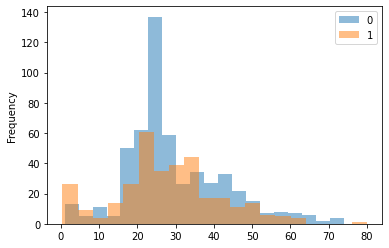

In [95]:
df1.groupby("alive")["age"].plot.hist(legend=True,alpha=0.5,bins=20)

It seems children(age<15) have a high % of survival, we should explicitly create a feature for this

In [96]:
child =15

In [97]:
df1["minor"]=df1["age"]<15

In [98]:
sum(df1["minor"])

77

There are 77 minors

In [99]:
df1

,Id,class,num_sibling/spouse,num_parent/child,ticket,price,departure_from,gender,alive,age,Family_Size,position,level,minor
0,1,3,1,0,CUGSP1ULC1,7.2500,S,male,0,22.0,1,Unknown,U,False
1,2,1,1,0,RWKPI7Y5RI,71.2833,C,female,1,38.0,1,85,C,False
2,3,3,0,0,DTHA121ED6,7.9250,S,female,1,26.0,0,Unknown,U,False
3,4,1,1,0,B46YX3C4TM,53.1000,S,female,1,35.0,1,123,C,False
4,5,3,0,0,YJKMT1KA7C,8.0500,S,male,0,35.0,0,Unknown,U,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,862,2,1,0,653K8328Q7,11.5000,S,male,0,21.0,1,Unknown,U,False
862,863,1,0,0,DGHP5IG5FR,25.9292,S,female,1,48.0,0,17,D,False
863,864,3,8,2,8CLGUH86EQ,69.5500,S,female,0,21.0,10,Unknown,U,False
864,865,2,0,0,0B9361U0EC,13.0000,S,male,0,24.0,0,Unknown,U,False


In [100]:
df1["level"]=df1["level"].replace({"U":None})

In [101]:
df1["position"]=df1["position"].replace({"Unknown":None})

In [102]:
df1.to_csv("cleaned_data.csv")